<b>

<p>
<center>
<font size="6">
Mini-Project: Analysing and Predicting Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
SC1015: Data Science and Artifial Intelligence, Nanyang Technological University
</font>
</center>
</p>

</b>

<p>
<center>
<font size="3">
<em>Done By: Chan Kit Ho and Chiang Qin Zhi</em>
</font>
</center>
</p>



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


# Part 1: Data Cleaning and Preparation

First, we import the dataset from a .csv file into a Pandas DataFrame and explore the dataset.

In [64]:
LifeData = pd.read_csv('Life Expectancy Data.csv')
LifeData

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


The description of the dataset is as available below:  
>**Year** : Year  
>**Status** : Developed or Developing status  
>**Life expectancy** : Life Expectancy in age  
>**Adult Mortality** : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  
>**infant deaths** : Number of Infant Deaths per 1000 population  
>**Alcohol** : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
>**percentage expenditure** : Expenditure on health as a percentage of Gross Domestic Product per capita(%)  
>**Hepatitis B** : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  
>**Measles** : Measles - number of reported cases per 1000 population  
>**BMI** : Average Body Mass Index of entire population  
>**under-five deaths** : Number of under-five deaths per 1000 population  
>**Polio** : Polio (Pol3) immunization coverage among 1-year-olds (%)  
>**Total expenditure** : General government expenditure on health as a percentage of total government expenditure (%)  
>**Diphtheria** : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  
>**HIV/AIDS** : Deaths per 1 000 live births HIV/AIDS (0-4 years)  
>**GDP** : Gross Domestic Product per capita (in USD)  
>**Population** : Population of the country  
>**thinness 1-19 years** : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  
>**thinness 5-9 years** : Prevalence of thinness among children for Age 5 to 9(%)  
>**Income composition of resources** : Human Development Index in terms of income composition of resources (index range from 0 to 1)  
>**Schooling** : Number of years of Schooling(years)  


In [65]:
print("Life Expectancy Dataset Shape:", LifeData.shape, "\n")
print("Life Expectancy Dataset:", LifeData.info, "\n")

Life Expectancy Dataset Shape: (2938, 22) 

Life Expectancy Dataset: <bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infa

Definitions of Variables:


We can see that there are multiple null or missing values. As part of the process, we will be removing them and placing them in a new DataFrame.

In [66]:
LifeData_Clean = pd.DataFrame(LifeData) #Duplicating the Dataframe
LifeData_Clean = LifeData_Clean.dropna()
LifeData_Clean = LifeData_Clean.loc[(LifeData_Clean != 0).all(axis=1)]

#LifeData_Clean = LifeData_Clean[(LifeData_Clean["Measles "]!= 0) & (LifeData_Clean["Measles "].notna())] # Removing rows with column Measles == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean["GDP"]!= 0) & (LifeData_Clean["GDP"].notna())] # Removing rows with column GDP == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean[" HIV/AIDS"]!= 0) & (LifeData_Clean[" HIV/AIDS"].notna())] # Removing rows with column HIV/AIDS == 0 or NA.

#LifeData_Clean.to_csv('LifeData_Clean.csv')

In [67]:
LifeData_Clean


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


Noting that the following variables - Hepatitis B, Polio and Diphtheria reflect the immunization coverage among 1-year-olds (%), we will group these variables into one single variable "Essential Immunization", which reflects the essential immunization coverage among 1-year-olds (%) for simplistic sake.

In [68]:
LifeData_Clean["Essential Immunization"] = round((LifeData_Clean["Hepatitis B"] + LifeData_Clean["Polio"] + LifeData_Clean["Diphtheria "]) / 3,1)
# Drop the individual columns for Hepatitis B, Polio, and Diphtheria
LifeData_Clean.drop(["Hepatitis B", "Polio", "Diphtheria "], axis=1, inplace=True)
print(LifeData_Clean.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Measles    BMI   \
0             62     0.01               71.279624      1154   19.1   
1             64     0.01               73.523582       492   18.6   
2             66     0.01               73.219243       430   18.1   
3             69     0.01               78.184215      2787   17.6   
4             71     0.01                7.097109      3013   17.2   

   under-five deaths   Total expenditure   HIV/AIDS         GDP  Population  \
0                  83               8.16        0.1  584.259210  33736494

In [69]:
LifeData_Clean


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Essential Immunization
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,45.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,8.18,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,60.7
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,63.3
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,67.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9696,29.4,44,5.37,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0,62.3
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,853,29.0,45,6.26,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9,71.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,242,28.2,46,4.47,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6,72.7
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,212,27.9,45,5.12,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5,48.7


# Part 2: Exploratory Data Analysis (EDA)

As there too many variables, we can check the correlation of the other predictor variables with the response variable, Life Expectancy, to determine which variables to pick. 

This is because, in later sections, using too many variables will result in overfitting for our linear regression model. Though R^2 will increase by virtue of adding more variables, Adjusted R^2 which accounts for number of predictors will be affected.

In [70]:
LifeData_Clean.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Total expenditure                  float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Essential Immunization             float64
dtype: object

In [71]:
LifeData_Clean["infant deaths"] = LifeData_Clean["infant deaths"].astype(float)
LifeData_Clean["Measles "] = LifeData_Clean["Measles "].astype(float)
LifeData_Clean["under-five deaths "] = LifeData_Clean["under-five deaths "].astype(float)

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

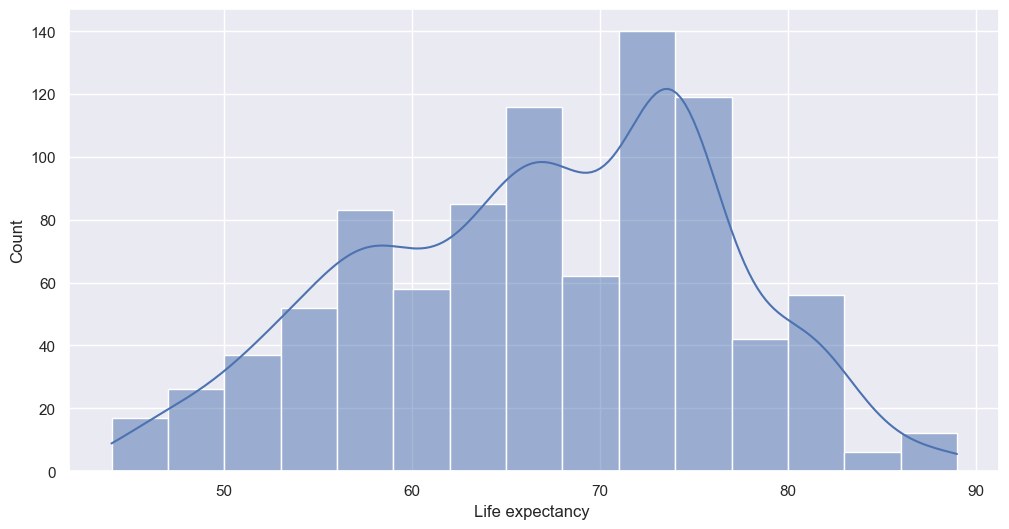

In [72]:
sb.set (rc = {'figure.figsize':(12, 6)})
sb.histplot(LifeData_Clean["Life expectancy "], kde = True)

In [73]:
LifeData_Clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Essential Immunization
Year,1.000000,-0.002501,-0.029692,0.014219,-0.152919,0.051003,-0.070602,-0.055215,0.017748,0.015462,-0.144144,0.091984,0.016266,0.081687,0.070472,-0.029279,0.033344,0.017575
Life expectancy,-0.002501,1.000000,-0.702307,-0.125523,0.339934,0.436669,-0.011987,0.605058,-0.153074,0.094215,-0.586232,0.483453,0.017780,-0.399659,-0.399611,0.864348,0.725067,0.400791
Adult Mortality,-0.029692,-0.702307,1.000000,-0.008680,-0.096056,-0.249848,-0.055224,-0.344847,0.011892,-0.026324,0.576758,-0.276079,-0.048740,0.190015,0.210818,-0.506721,-0.382048,-0.214761
infant deaths,0.014219,-0.125523,-0.008680,1.000000,-0.096437,-0.105531,0.512668,-0.255115,0.996776,-0.166836,-0.031159,-0.116206,0.668024,0.504856,0.505224,-0.169008,-0.201424,-0.243667
Alcohol,-0.152919,0.339934,-0.096056,-0.096437,1.000000,0.415806,-0.026480,0.418248,-0.088618,0.227552,0.027075,0.427706,-0.019540,-0.425796,-0.397185,0.563630,0.615412,0.242601
percentage expenditure,0.051003,0.436669,-0.249848,-0.105531,0.415806,1.000000,-0.071561,0.362754,-0.107660,0.186652,-0.099938,0.940507,-0.007595,-0.296896,-0.300491,0.492480,0.510797,0.114682
Measles,-0.070602,-0.011987,-0.055224,0.512668,-0.026480,-0.071561,1.000000,-0.151210,0.496434,-0.124573,-0.037339,-0.073100,0.307627,0.156043,0.148514,-0.056756,-0.088301,-0.085539
BMI,-0.055215,0.605058,-0.344847,-0.255115,0.418248,0.362754,-0.151210,1.000000,-0.264582,0.222941,-0.203159,0.406860,-0.073839,-0.511969,-0.522032,0.695487,0.629257,0.314646
under-five deaths,0.017748,-0.153074,0.011892,0.996776,-0.088618,-0.107660,0.496434,-0.264582,1.000000,-0.164592,-0.018063,-0.119620,0.654803,0.505103,0.504208,-0.189023,-0.215044,-0.263151
Total expenditure,0.015462,0.094215,-0.026324,-0.166836,0.227552,0.186652,-0.124573,0.222941,-0.164592,1.000000,0.080555,0.202771,-0.090854,-0.220614,-0.231430,0.135099,0.242580,0.161749


Heatmap for easier visualisation.

<AxesSubplot:>

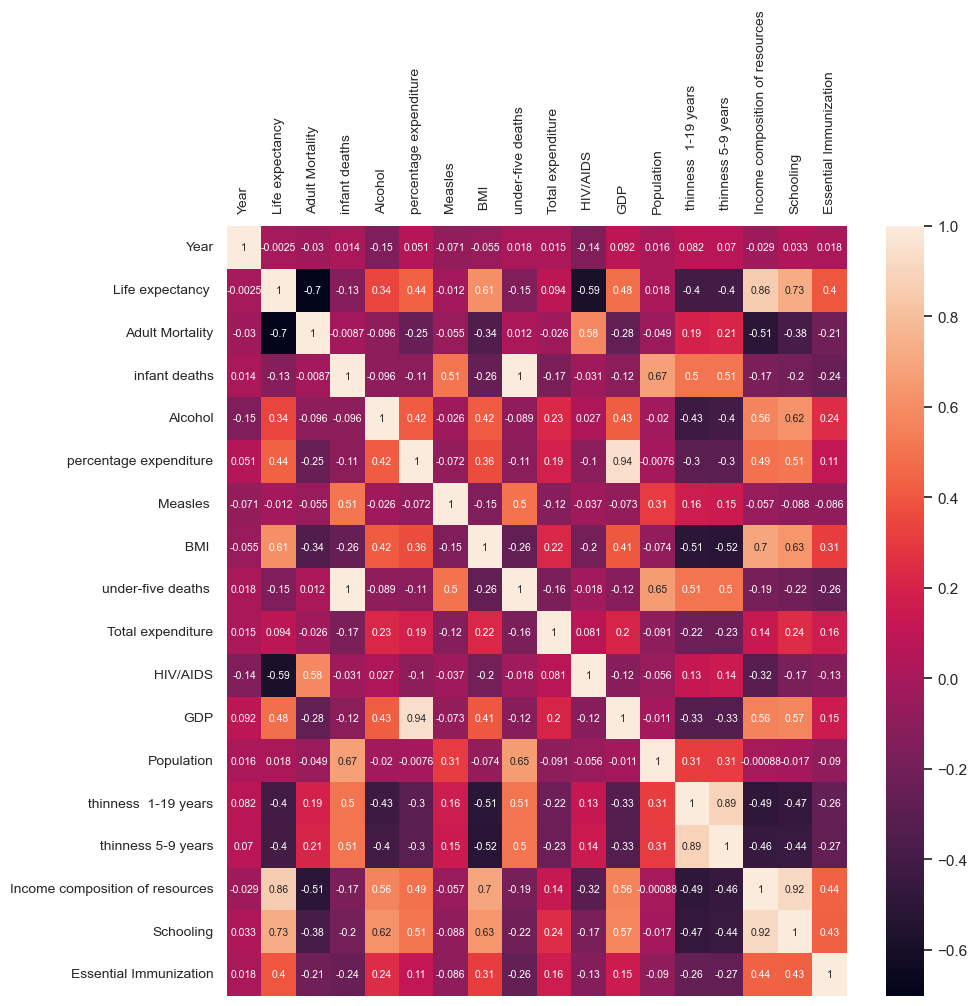

In [74]:
sns.set (rc = {'figure.figsize':(10, 10)})
plt.tick_params(labelsize=10, labelbottom = False, labeltop=True)
sns.heatmap(LifeData_Clean.corr(), annot = True, annot_kws={"fontsize":7.5})

Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' and 'Income Composition of Resources' in the Life Expectation data.

Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:  
Adult Mortality (negative)  
HIV/AIDS (negative)  
Income Composition of Resources (positive)  
Schooling (positive)

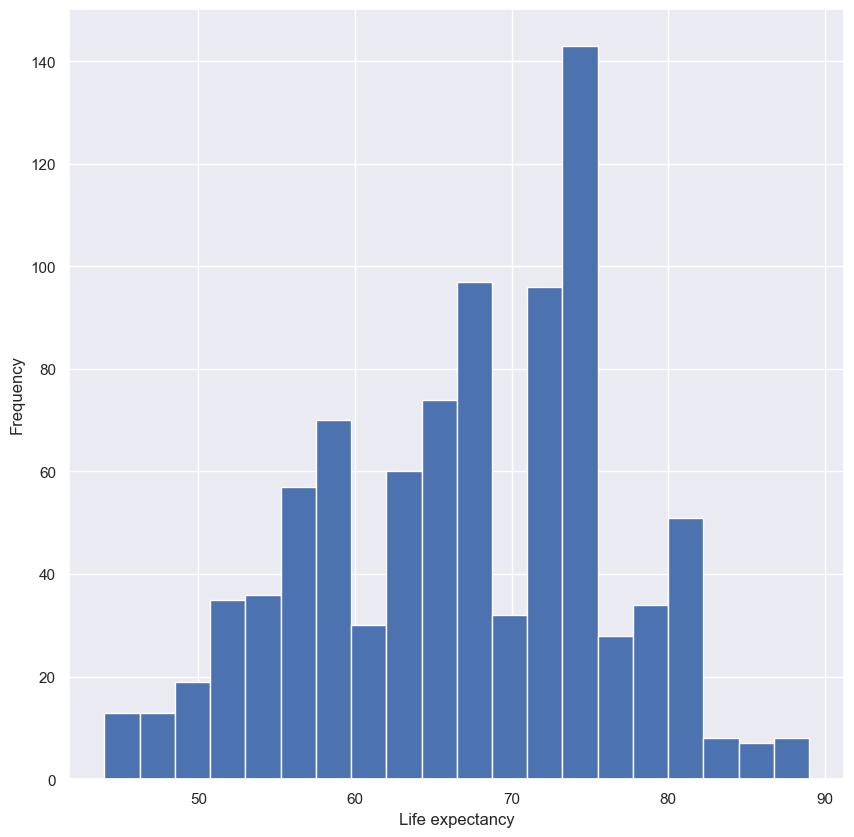

In [75]:
plt.hist(LifeData_Clean["Life expectancy "], bins=20)
plt.xlabel("Life expectancy")
plt.ylabel("Frequency")
plt.show()

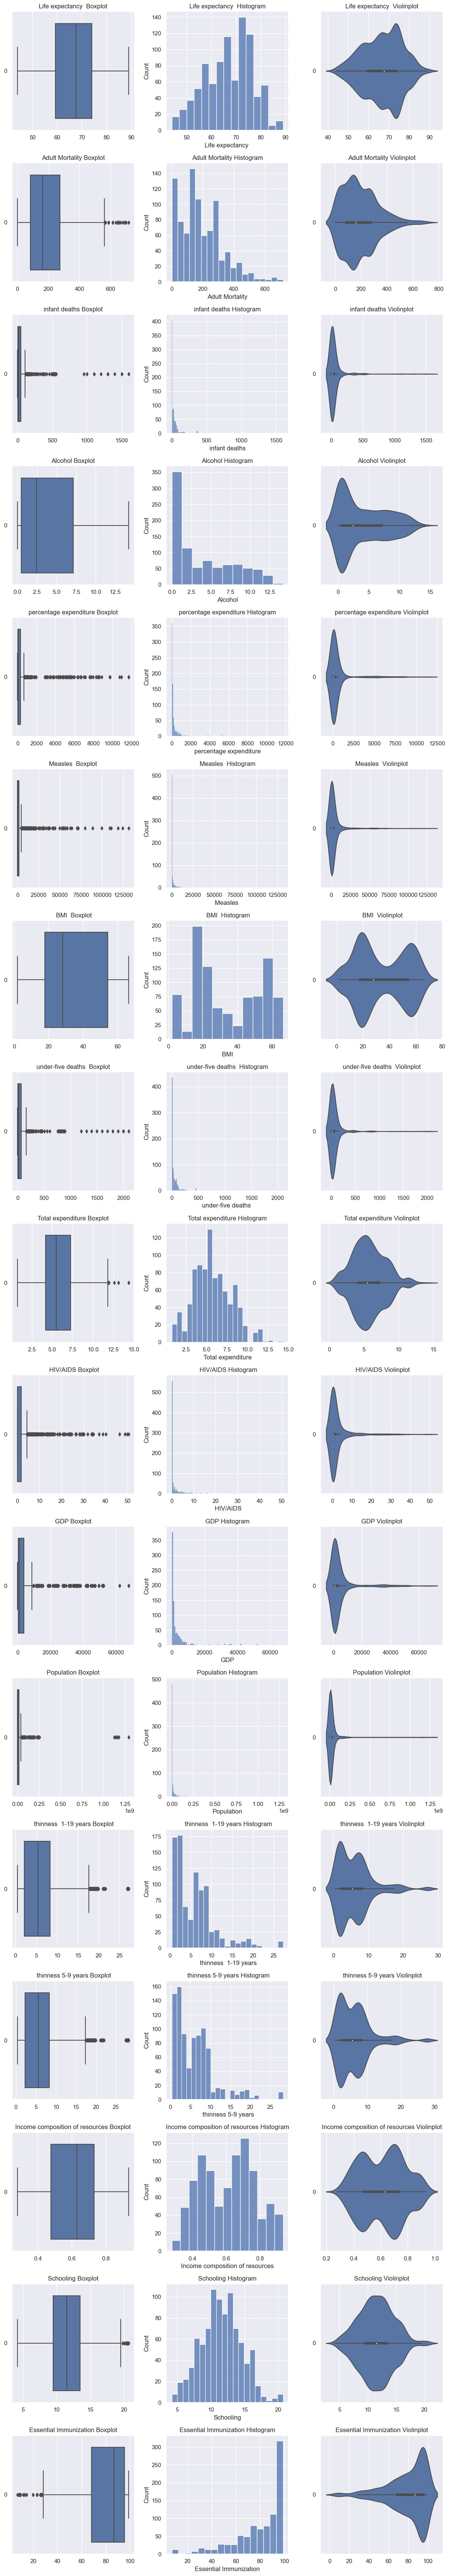

In [76]:
numeric_data = LifeData_Clean.select_dtypes(include=[float])

# Create a grid of subplots with 3 columns and n rows
n = len(numeric_data.columns)
fig, axes = plt.subplots(nrows=n, ncols=3, figsize=(12, 4*n))

# Loop through each numeric variable and create plots
count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(f"{var} Boxplot")
    axes[count,1].set_title(f"{var} Histogram")
    axes[count,2].set_title(f"{var} Violinplot")
    count += 1

plt.tight_layout()
plt.show()

# Part 3: Machine Learning

In this section, we will use machine learning to predict Life Expectancy. First we will use a Multivariate Linear Regression Model, followed by a Classification Tree.

In [77]:
# When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
LifeData_Clean.drop(["Country", "Status"], axis=1, inplace=True)

# Independent/Predictor Variables: Last two columns (Income composition of resources, Schooling)
x = LifeData_Clean.iloc[:, [-2,-1]].values

# Dependent/Response Variable:
y = LifeData_Clean["percentage expenditure"].values.reshape(-1,1)            

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 69)
lm = LinearRegression()
linearmodel = lm.fit(x_train, y_train)